In [1]:
import pandas as pd
StudentPerformance=pd.read_csv('studentPerformanc.csv')
StudentPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Information about the data.
StudentPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#Shape of the data.
print(f'Shape of the data\n{StudentPerformance.shape}')

Shape of the data
(1000, 8)


In [6]:
#Datatypes in the dataset.
StudentPerformance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
#Cleaning of the data.
#checking for missing values
StudentPerformance.isnull().sum()/len(StudentPerformance)*100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [8]:
#formatting the columns names.
StudentPerformance.columns=StudentPerformance.columns.str.replace(' ','_')


In [9]:
StudentPerformance.rename({'race/ethnicity':'ethnicity'},axis=1,inplace=True)
StudentPerformance.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
#Removing Duplicates.
StudentPerformance.drop_duplicates(inplace=True)


In [11]:
#Removing Outliers.
numeric_col=StudentPerformance[['reading_score','writing_score','math_score']]
for col in numeric_col:
    Q1=StudentPerformance[col].quantile(0.25)
    Q3=StudentPerformance[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    StudentPerformance=StudentPerformance[(StudentPerformance[col]>=lower_bound) & (StudentPerformance[col]<=upper_bound)]

In [12]:
#Exploratory analysis.
StudentPerformance.describe()

,math_score,reading_score,writing_score
count,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802
std,14.409394,14.016760,14.525267
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [13]:
numeric_col=StudentPerformance[['math_score','reading_score','writing_score']]

In [14]:
#Correlation of the numerical columns
corr=numeric_col.corr()
corr

,math_score,reading_score,writing_score
math_score,1.000000,0.801405,0.783349
reading_score,0.801405,1.000000,0.950629
writing_score,0.783349,0.950629,1.000000


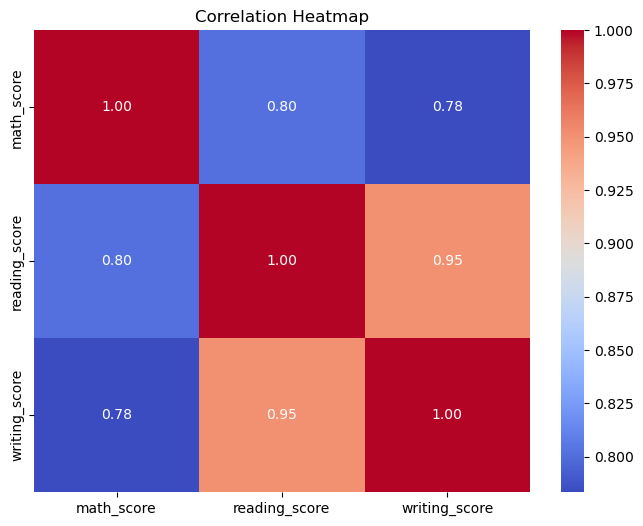

In [15]:
#Visualizing it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

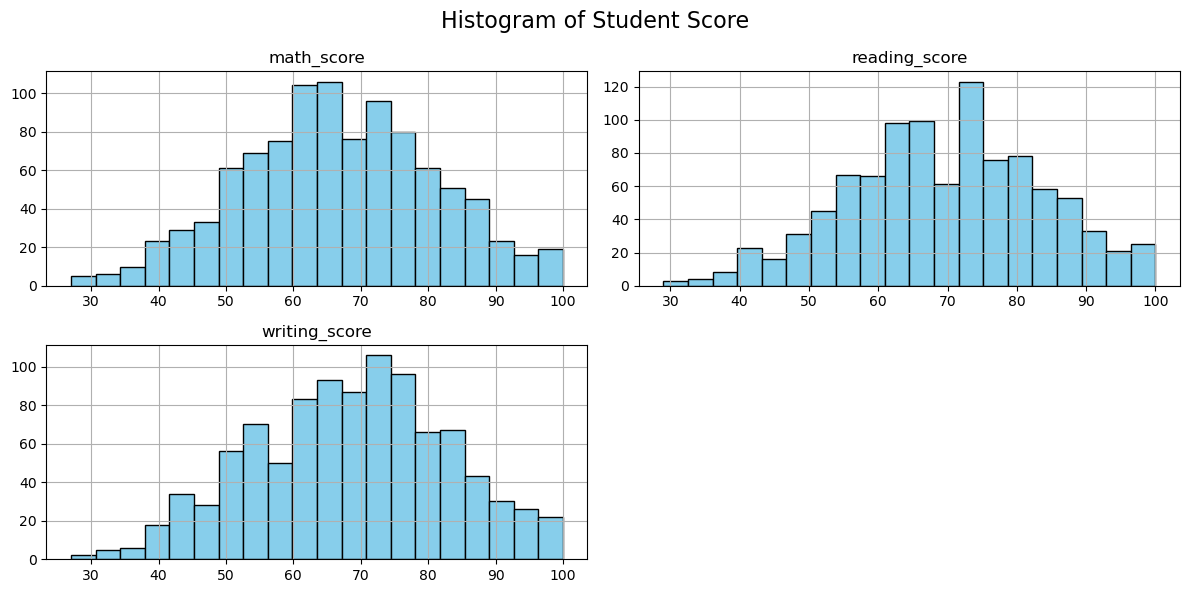

In [16]:
#Distribution of the numerical columns.
numeric_col.hist(bins=20,figsize=(12,6),color='skyblue',edgecolor='black')
plt.suptitle('Histogram of Student Score',fontsize=16)
plt.tight_layout()
plt.show()

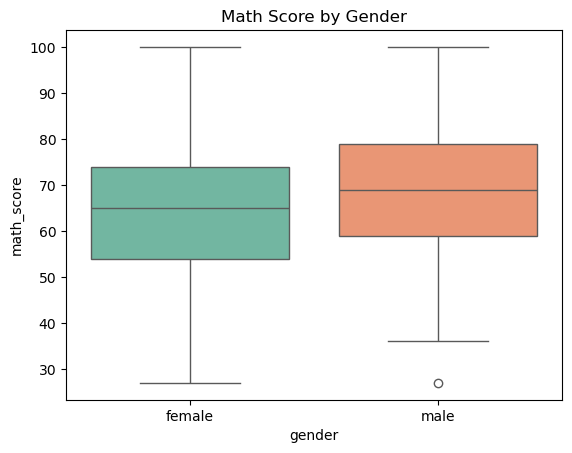

In [17]:
#Boxplot of each score by gender.
#Maths Score
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x='gender',y='math_score',data=StudentPerformance,palette='Set2')
plt.title('Math Score by Gender')
plt.show()

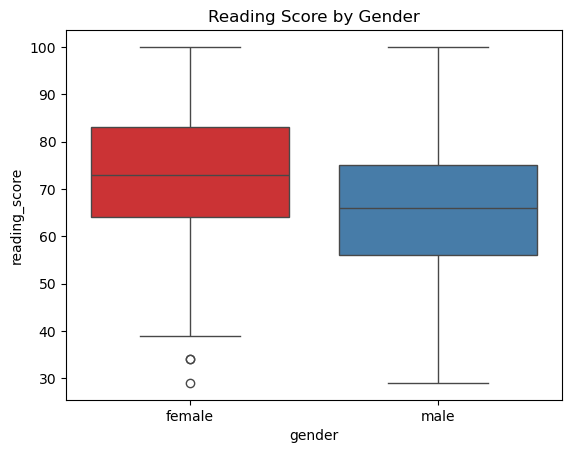

In [18]:
#Reading Score
sns.boxplot(x='gender',y='reading_score',data=StudentPerformance,palette='Set1')
plt.title('Reading Score by Gender')
plt.show()

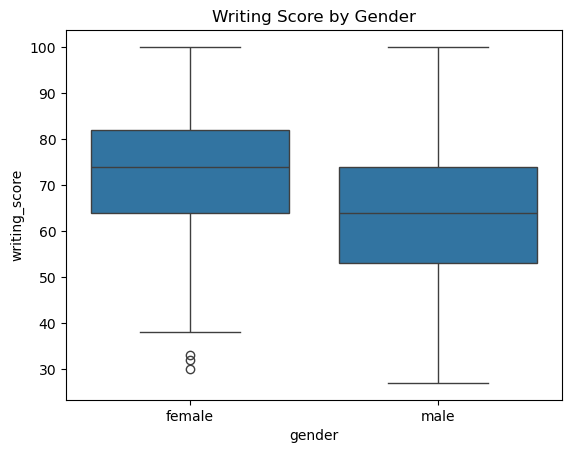

In [19]:
#Writing Score
sns.boxplot(x='gender',y='writing_score', data=StudentPerformance)
plt.title('Writing Score by Gender')
plt.show()

In [48]:
StudentPerformance.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
#Number of each gender
StudentPerformance['gender'].value_counts()

gender
female    510
male      478
Name: count, dtype: int64

In [50]:
#Number of each ethnicity
StudentPerformance['ethnicity'].value_counts()

ethnicity
group C    316
group D    261
group B    184
group E    139
group A     88
Name: count, dtype: int64

In [51]:
#Number of each test preparation course.
StudentPerformance['test_preparation_course'].value_counts()

test_preparation_course
none         631
completed    357
Name: count, dtype: int64

In [52]:
#Number of each lunch.
StudentPerformance['lunch'].value_counts()

lunch
standard        643
free/reduced    345
Name: count, dtype: int64

In [53]:
#Number of each parental level of education.
StudentPerformance['parental_level_of_education'].value_counts()

parental_level_of_education
some college          222
associate's degree    221
high school           193
some high school      175
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [54]:
#The gender that was able to complete their courses the most.
StudentPerformance.groupby('gender')['test_preparation_course'].value_counts()

gender  test_preparation_course
female  none                       327
        completed                  183
male    none                       304
        completed                  174
Name: count, dtype: int64

In [55]:
StudentPerformance.groupby('gender')['lunch'].value_counts()

gender  lunch       
female  standard        328
        free/reduced    182
male    standard        315
        free/reduced    163
Name: count, dtype: int64

In [20]:
#Creating a column of each student average score.
StudentPerformance['average_score']=StudentPerformance[['math_score','reading_score','writing_score']].mean(axis=1)


In [62]:
#Parental level of education average scores.
StudentPerformance.groupby('parental_level_of_education')['average_score'].mean().sort_values(ascending=False)

parental_level_of_education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.740573
some college          69.195195
some high school      66.078095
high school           63.685665
Name: average_score, dtype: float64

In [24]:
#Building a linear regression model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [71]:
#Selecting the dependent and independent variables.
X=StudentPerformance[['math_score','reading_score','writing_score']]
y=StudentPerformance['average_score']

In [72]:
#Splitting the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
#Building the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Making the predictions.
y_predict=model.predict(X_test)


In [ ]:
#Evaluating the model.
from sklearn.metrics import r2_score
r2=r2_score(y_predict,y_test)
r2

In [21]:
#Using the categorical features to build the model again
#changing the 
x=StudentPerformance[['lunch','gender','parental_level_of_education','test_preparation_course']]
y=StudentPerformance['average_score']

In [25]:
#Encoding the categorical features.
x_encoded=pd.get_dummies(x,drop_first=True)

In [27]:
#Splitting the data
x_train,x_test,Y_train,Y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)

In [29]:
#building the model
model2=LinearRegression()
model2.fit(x_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
#Making predictions
Y_pred=model2.predict(x_test)

In [35]:
#Evaluating the model with R squared 
from sklearn.metrics import r2_score
Evaluate=r2_score(Y_pred,Y_test)
Evaluate

-2.6068131671231822